### Ian Chow

### CTA200

### Assignment 3

Import packages as needed:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# set font size in graphs to be bigger
plt.rc('font', size = 16)

## Part 1

For each point in the complex plane $c = x + iy$, with $-2 < x < 2$ and $-2 < y < 2$, set $z_0 = 0$ and iterate the equation $z_{i + 1} = z_i^2 + c$. 
Note what happens to the $z_i$'s: some points will remain bounded in absolute value $|z|^2 = \Re(z)^2 + \Im(z)^2$, while others will run off to infinity. 
Make an image  in which your points $c$ that diverge are given one color and those that stay bounded are given another.
Make a second image where the points are coloured by a colourscale that indicates the iteration number at which the given point diverged.

For this question, put the code that does the iteration in a function and place this function in a separate .py file which you import in your .ipynb.
Perform the plots in the notebook.

The `quad_map_colouring()` function is located in the `q1.py` file. Computing the colour array using the `quad_map_colouring()` function:

In [2]:
# import quad_map_colouring() function from q1.py
from q1 import quad_map_colouring

# generate the grid
npoints = 1000  # number of points in the x and y domain each

# define grid of real and imaginary numbers each with npoints
real, imag = np.linspace(-2, 2, npoints), np.linspace(-2, 2, npoints)
cs = np.array([complex(x, y) for x in real for y in imag])  # construct grid of points using list comprehension

# compute the colour array for all the points using quad_map_colouring
colour_array = np.array([quad_map_colouring(c) for c in cs])

The first plot is below. Points $c$ that converge are coloured black, while points that diverge are coloured white,

/tmp/ipykernel_105/1958413347.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('quad_map_colouring_bw.png', fmt='png')


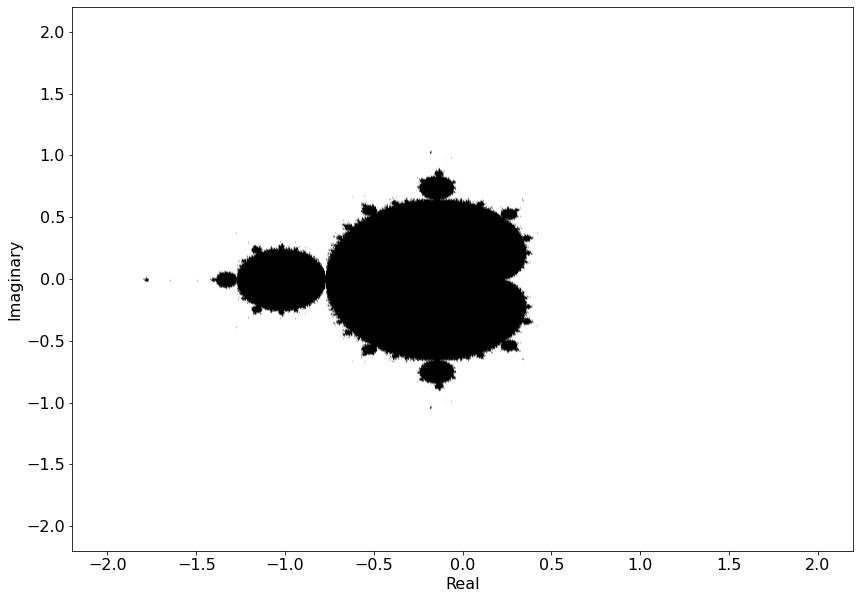

In [3]:
# first plot
plt.figure(figsize = (14, 10))
# this colours it so that values of -1 (convergence) are black and any higher values (divergence) are white
plt.scatter(cs.real, cs.imag, c=colour_array, cmap=plt.cm.get_cmap('binary_r'), vmin=-1, vmax=1)
plt.xlabel('Real'), plt.ylabel('Imaginary')
plt.savefig('quad_map_colouring_bw.png', fmt='png')

The second plot is below. Points $c$ that converge are coloured with a very dark blue in the center, while points that diverge are coloured depending on the iteration number at which they diverged, indicated by the colourbar on the right side of the graph. The colourbar is only scaled to a maximum of $25$ iterations (to improve contrast), although some points near the boundary of the set may take more than $25$ iterations to diverge.

/tmp/ipykernel_105/2166890408.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('quad_map_colouring_scale.png', fmt='png')


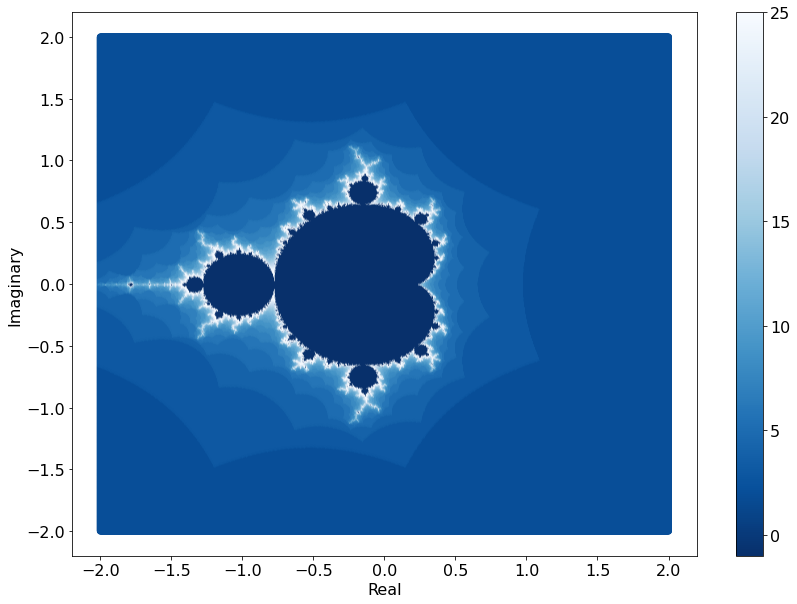

In [4]:
plt.figure(figsize = (14, 10))
plt.scatter(cs.real, cs.imag, c=colour_array, cmap=plt.cm.get_cmap('Blues_r'), vmin=-1, vmax=25)
plt.xlabel('Real'), plt.ylabel('Imaginary')
plt.colorbar()  # display the colourbar this time
plt.savefig('quad_map_colouring_scale.png', fmt='png')

## Part 2

The function `lorenz_equations()` is below:

In [5]:
def lorenz_equations(t, xyz, sigma, r, b):
    """
    lorenz_equations(t, xyz, sigma, r, b):
    
    The Lorenz equations as given in the assignment prompt:
    dx/dt = -sigma(X - Y)
    dy/dt = rX - y - XZ
    dz/dt = -bZ + XY
    
    Used with scipy.integrate.solve_ivp() to solve the Lorenz equations for a given set of initial conditions.
    
    Parameters:
    ----------
    t: float
    Time to integrate to numerically, used with scipy.integrate.solve_ivp()
    xyz: 3-tuple of floats
    Values of X, Y, and Z for this iteration of the Lorenz equations
    sigma: float
    Prandtl number (dimensionless)
    r: float
    Rayleigh number (dimensionless)
    b: float
    length scale (dimensionless)
    
    Returns
    ---------
    [xdot, ydot, zdot]: array of floats
    The time derivatives of x, y, and z given by the Lorenz equations
    
    """
    x, y, z = xyz  # tuple unpack
    
    xdot = -sigma * (x - y)
    ydot = (r * x) - y  - (x * z)
    zdot = -(b * z) + (x * y)
    
    return [xdot, ydot, zdot]

We use `scipy.integrate.solve_ivp()` to integrate the equations for $t = 60$ in dimensionless time units, with Lorenz' initial conditions defined as $W_0 = [0, 1, 0]$ and the parameter values $[\sigma, r, b] = [10, 28, 8/3]$ as required.

In [6]:
from scipy.integrate import solve_ivp

ivp_ts = [0., 60.]  # times to integrate over
w0 = [0., 1., 0.]  # w0 values
params = (10., 28., 8./3.)  # params sigma, r, b

# solving the ivp
lorenz_sols = solve_ivp(lorenz_equations, ivp_ts, w0, args=params, dense_output=True)

Now reproducing Lorenz' Figure $1$ using our solutions, we have:

/tmp/ipykernel_105/2164287819.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('lorenz_fig_1.png', fmt='png')


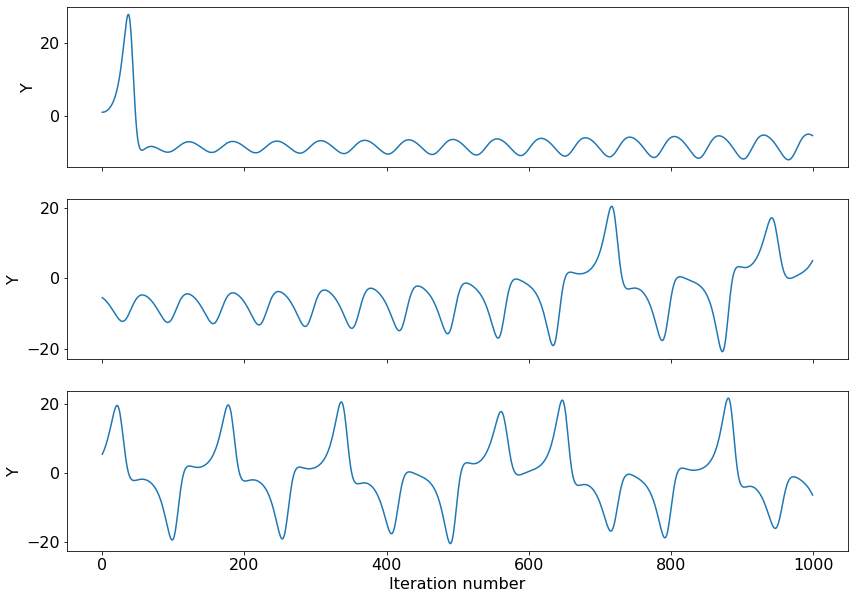

In [7]:
ntimes = 6000  # use 60000 iterations
times = np.linspace(ivp_ts[0], ivp_ts[-1], ntimes)  # array of times to plot over
delta_t = 0.01  # given in assignment

# divide N = t/delta_t, so:
ns = times/delta_t  # for plotting

# get the solutions for the lorenz equations for times
xs, ys, zs = lorenz_sols.sol(times)

# # plotting:
fig, (yax_1, yax_2, yax_3) = plt.subplots(3, 1, sharex=True, figsize = (14, 10))
# plot the first 3000 steps of iteration in the same way as Lorenz
yax_1.plot(ns[0:1000], ys[0:1000])
yax_2.plot(ns[0:1000], ys[1000:2000])  # use 0:1000 for the first ones to make sure the axes are shared
yax_3.plot(ns[0:1000], ys[2000:3000])  # like in Lorenz's Fig. 1
# labelling x, y axes:
yax_3.set_xlabel('Iteration number')  # iteration number
yax_1.set_ylabel('Y'), yax_2.set_ylabel('Y'), yax_3.set_ylabel('Y')
# save:
plt.savefig('lorenz_fig_1.png', fmt='png')

Now reproduce Figure $2$:

/tmp/ipykernel_105/3396151955.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('lorenz_fig_2.png', fmt='png')


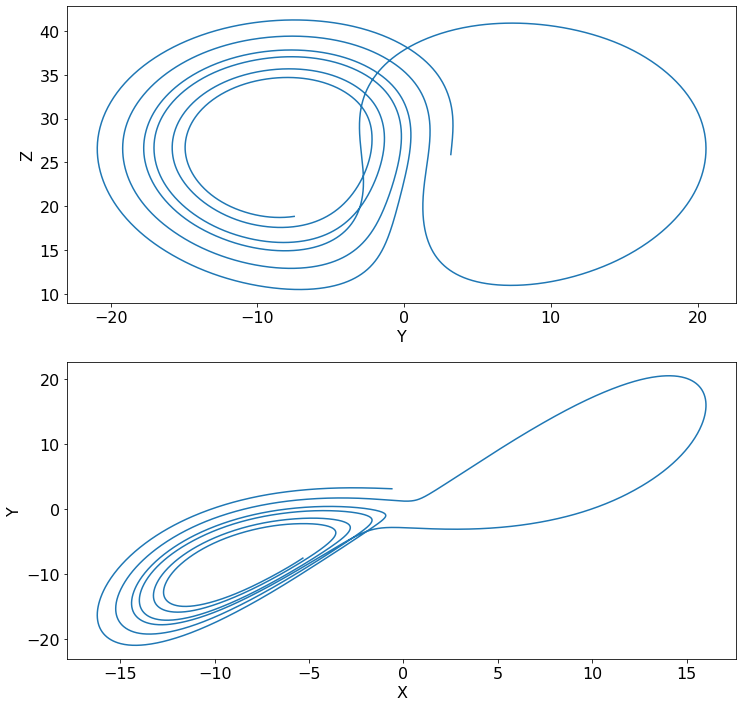

In [8]:
times2 = np.linspace(14, 19, ntimes)
# compute N again
ns2 = times2/delta_t

xs2, ys2, zs2 = lorenz_sols.sol(times2)


# plotting like Lorenz's Fig. 2
fig, (yz_ax, xy_ax) = plt.subplots(2, 1, figsize = (12, 12))
# plot the yz plane
yz_ax.plot(ys2, zs2)
yz_ax.set_xlabel('Y'), yz_ax.set_ylabel('Z')
# plot the xy plane
xy_ax.plot(xs2, ys2)
xy_ax.set_xlabel('X'), xy_ax.set_ylabel('Y')
plt.savefig('lorenz_fig_2.png', fmt='png')

Find solution for $W_0' = W_0 + [0, 1e-8, 0]$

In [9]:
w0_prime = [a + b for a, b in zip(w0, [0, 1e-8, 0])]
# solve for solutions from w0 prime, and compare to for w0
lorenz_sols_prime = solve_ivp(lorenz_equations, ivp_ts, w0_prime, args=params, dense_output=True)

# compute ws, w_primes
ws = lorenz_sols.sol(times)
w_primes = lorenz_sols_prime.sol(times)
# find the distance between w and w prime as a function of time
# subtract the w and w prime vectors, transposing to get them in vector form
# then take the norm of each vector as the distance between them
distances = np.array([np.linalg.norm(vec) for vec in ws.T - w_primes.T])  # list comprehension

/tmp/ipykernel_105/1244515625.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('w_prime_distance.png', fmt='png')


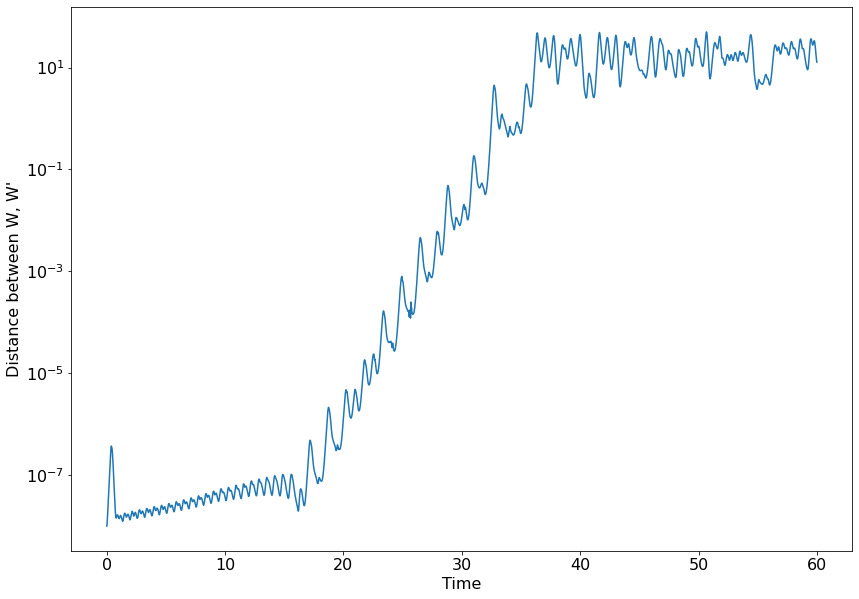

In [10]:
# plotting:
plt.figure(figsize = (14, 10))
plt.yscale('log')  # semilog scale (linear time, log distance)
plt.plot(times, distances)
plt.xlabel('Time')
plt.ylabel('Distance between W, W\'')
plt.savefig('w_prime_distance.png', fmt='png')

## Part 3:

Refer to the `.tex` file and the produced pdf for Part $3$.